In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
%matplotlib notebook

D:\Installation\Anaconda\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [3]:
style.use('ggplot')

In [4]:
start = datetime(2000,1,1)
end = datetime(2016,12,31)

In [5]:
df = web.DataReader('TSLA', 'yahoo', start, end)

In [6]:
# print(df.head(6))

In [7]:
# df.to_csv('goog.csv')
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
# print(df.head())

In [8]:
# df.plot()
# plt.show()

In [9]:
# print(df['Adj Close'].head())
# df['Adj Close'].plot()
# plt.show()

In [10]:
# Calculate the 100 day moving average
df['100ma'] = df['Adj Close'].rolling(window=100).mean()
df['50ma'] = df['Adj Close'].rolling(window=50).mean()
# Remove the rows which have NaN inplace
df.dropna(inplace=True)
print(df.head())

                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2010-11-17  30.200001  30.750000  28.610001  29.490000  29.490000   750000   
2010-11-18  30.670000  30.740000  28.920000  29.889999  29.889999   956100   
2010-11-19  30.160000  31.370001  29.700001  30.990000  30.990000  1150500   
2010-11-22  31.570000  33.450001  31.500000  33.400002  33.400002  1529700   
2010-11-23  33.290001  35.680000  32.189999  34.570000  34.570000  1577800   

              100ma     50ma  
Date                          
2010-11-17  20.9879  22.1422  
2010-11-18  21.0479  22.3258  
2010-11-19  21.1195  22.5422  
2010-11-22  21.2339  22.7958  
2010-11-23  21.3876  23.0648  


<IPython.core.display.Javascript object>


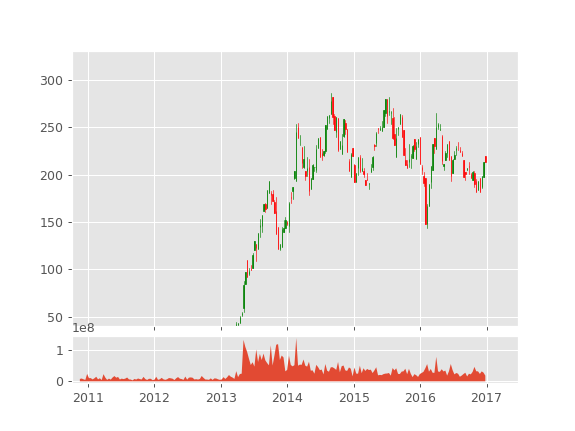

In [11]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=5, colspan=1, sharex=ax1)

In [17]:
# Plot the Adjusted Close as the first graph
# ax1.set_prop_cycle(['red', 'blue', 'black'])
ax1.plot(df.index, df['Adj Close'])
# Plot the 100 moving average as the second graph
ax1.plot(df.index, df['100ma'])
ax1.plot(df.index, df['50ma'])


ax2.bar(df.index, df['Volume'])
plt.show()

In [18]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()
print(df_ohlc.head())

                 open       high        low      close
Date                                                  
2010-11-17  29.490000  35.470001  29.490000  35.320000
2010-11-27  34.330002  35.330002  30.309999  30.309999
2010-12-07  31.559999  32.369999  28.530001  30.809999
2010-12-17  31.360001  32.630001  30.090000  30.090000
2010-12-27  25.549999  27.730000  25.549999  26.830000


In [19]:
df_ohlc.reset_index(inplace=True)
print(df_ohlc.head())

        Date       open       high        low      close
0 2010-11-17  29.490000  35.470001  29.490000  35.320000
1 2010-11-27  34.330002  35.330002  30.309999  30.309999
2 2010-12-07  31.559999  32.369999  28.530001  30.809999
3 2010-12-17  31.360001  32.630001  30.090000  30.090000
4 2010-12-27  25.549999  27.730000  25.549999  26.830000


In [20]:
# Convert dates into a format which is uderstandable by matplotlib(~700000)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
print(df_ohlc.head())

       Date       open       high        low      close
0  734093.0  29.490000  35.470001  29.490000  35.320000
1  734103.0  34.330002  35.330002  30.309999  30.309999
2  734113.0  31.559999  32.369999  28.530001  30.809999
3  734123.0  31.360001  32.630001  30.090000  30.090000
4  734133.0  25.549999  27.730000  25.549999  26.830000


In [21]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

In [22]:
# This will grab the dates from above and display them as beautiful dates
ax1.xaxis_date()

In [23]:
candlestick_ohlc(ax1, df_ohlc.values, width=2,colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()